<a href="https://colab.research.google.com/github/Pallavi-S-02/Data-Science-Projects/blob/main/Linear%20Regression/Linear_Regression_First_Innings_Score_Prediction_for_Indian_Premier_League_(IPL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
# Importing essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [278]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [279]:
dataset = pd.read_csv("/content/gdrive/MyDrive/ipl.csv")

## **Checking the dataset.**

In [280]:
dataset.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [281]:
dataset.shape

(76014, 15)

In [282]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


## Exploratory Data Aalysis:

**Numerical features**

In [283]:
# List of numerical features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != "O"]

print("Length of Numerical Features is: ", len(numerical_features))

# Visualize the numerical features
dataset[numerical_features].head()


Length of Numerical Features is:  9


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,1,0,0.1,1,0,0,0,222
1,1,1,0,0.2,1,0,0,0,222
2,1,2,0,0.2,2,0,0,0,222
3,1,2,0,0.3,2,0,0,0,222
4,1,2,0,0.4,2,0,0,0,222


In [284]:
# Numerical features are usually of 2 types
# Continuous variables and Discrete variable

discrete_features = [ feature for feature in numerical_features if len(dataset[feature].unique()) < 25 ]
print("Length of Discrete Features: ", len(discrete_features))

Length of Discrete Features:  2


In [285]:
discrete_features

['wickets', 'wickets_last_5']

In [286]:
dataset[discrete_features].head()

,wickets,wickets_last_5
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


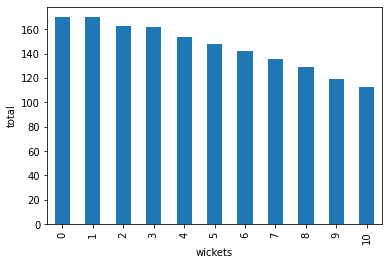

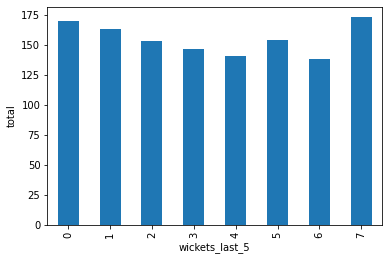

In [287]:
# Lets find the relationship between Discrete Features and total(dependent feature) 
# EDA is to gather some information from data therefore we always have to comapre with dependent feature.

for feature in discrete_features:
  data = dataset.copy()
  data.groupby(feature)["total"].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("total")
  plt.show()


**Continuous Variable**

In [288]:
continuous_features = [ feature for feature in numerical_features if feature not in discrete_features]
print("Length of continuous features is: ", len(continuous_features))

Length of continuous features is:  7


In [289]:
continuous_features

['mid', 'runs', 'overs', 'runs_last_5', 'striker', 'non-striker', 'total']

In [290]:
dataset[continuous_features].head()

,mid,runs,overs,runs_last_5,striker,non-striker,total
0,1,1,0.1,1,0,0,222
1,1,1,0.2,1,0,0,222
2,1,2,0.2,2,0,0,222
3,1,2,0.3,2,0,0,222
4,1,2,0.4,2,0,0,222


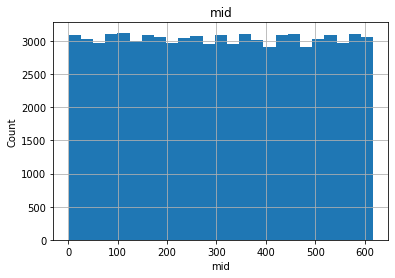

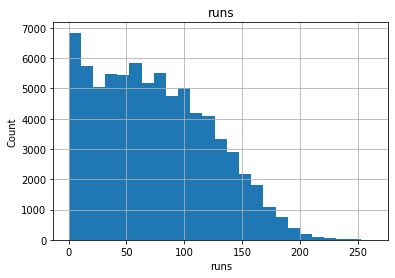

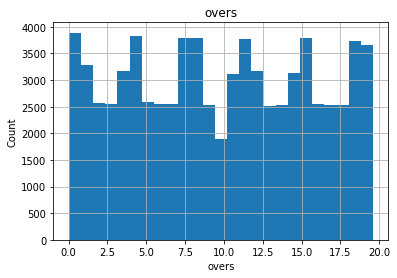

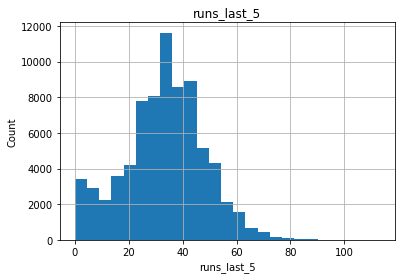

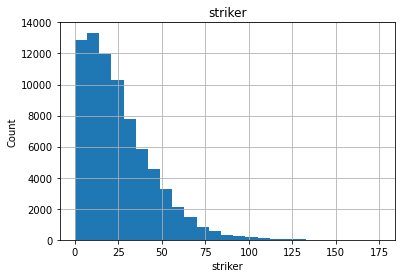

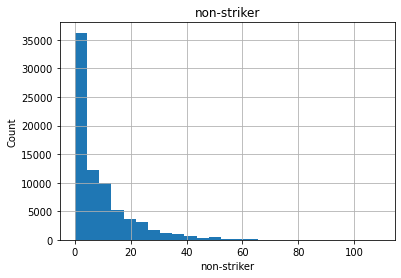

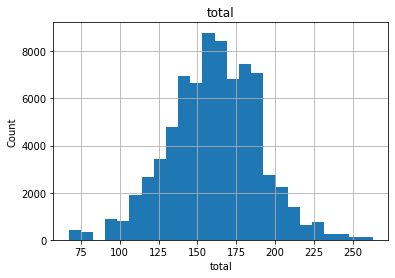

In [291]:
# Lets analyse the continuous values by creating histograms to understand the distributios

for feature in continuous_features:
  data = dataset.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

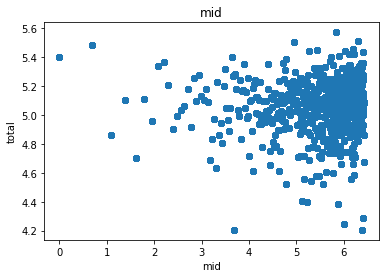

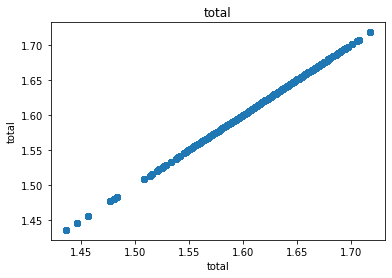

In [292]:
# We will do the logarithmic transformation for skewed features.

for feature in continuous_features:
  data = dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data["total"] = np.log(data["total"])
    plt.scatter(data[feature], data["total"])
    plt.xlabel(feature)
    plt.ylabel("total")
    plt.title(feature)
    plt.show()

**Categorical features**

In [293]:
# List of categorical features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == "O"]
categorical_features

['date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']

In [294]:
dataset[categorical_features].head()

,date,venue,bat_team,bowl_team,batsman,bowler
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


In [295]:
for feature in categorical_features:
  print("The feature is {} and number of categories are {}".format(feature, len(dataset[feature].unique())))

The feature is date and number of categories are 442
The feature is venue and number of categories are 35
The feature is bat_team and number of categories are 14
The feature is bowl_team and number of categories are 14
The feature is batsman and number of categories are 411
The feature is bowler and number of categories are 329


**Outliers Check**

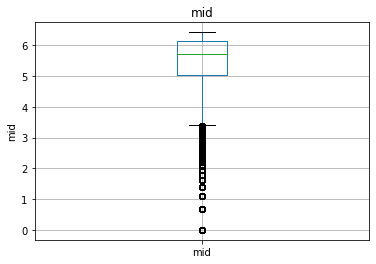

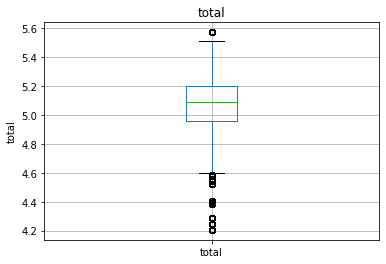

In [296]:
for feature in continuous_features:
  data = dataset.copy()
  if 0 in dataset[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()



Remember , boxplot does not work for categorical features. It only work for continuous features

**Missing Values**

In [297]:
# make the list of features which has NAN values

features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]
features_with_na


[]

Since, we dont have any missing values.

## Feature Engineering:

##### Data Cleaning

Points covered under this section:
1. Removing unwanted columns
2. Keeping only Consistent teamns.
3. Removing 1st 5 overs data in every match.
4. Converting the column "date" from string into datetime object

In [298]:
dataset.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [299]:
# Removing unwanted columns.
columns_to_remove = ["mid", "venue", "batsman", "bowler", "striker", "non-striker"]

print("Before removing unwanted columns: {}".format(dataset.shape))
dataset.drop(labels = columns_to_remove, axis=1, inplace=True)
print("After removing unwanted columns: {}".format(dataset.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [300]:
dataset.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [301]:
dataset.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [302]:
dataset.index

RangeIndex(start=0, stop=76014, step=1)

In [303]:
dataset["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [304]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [305]:
# Keeping only Consistent teams.
print("Before removing inconsistent teams: {}".format(dataset.shape))
dataset = dataset[(dataset["bat_team"].isin(consistent_teams)) & (dataset["bowl_team"].isin(consistent_teams))]
print("After removing inconsistent teams: {}".format(dataset.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [306]:
dataset["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [307]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(dataset.shape))
dataset = dataset[dataset['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(dataset.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [308]:
# Converting the column "date" from string into datetime object.
from datetime import datetime 
print("Before converting 'date' column from string to datetime object: {}".format(type(dataset.iloc[0,0])))
dataset['date'] = dataset['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(dataset.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


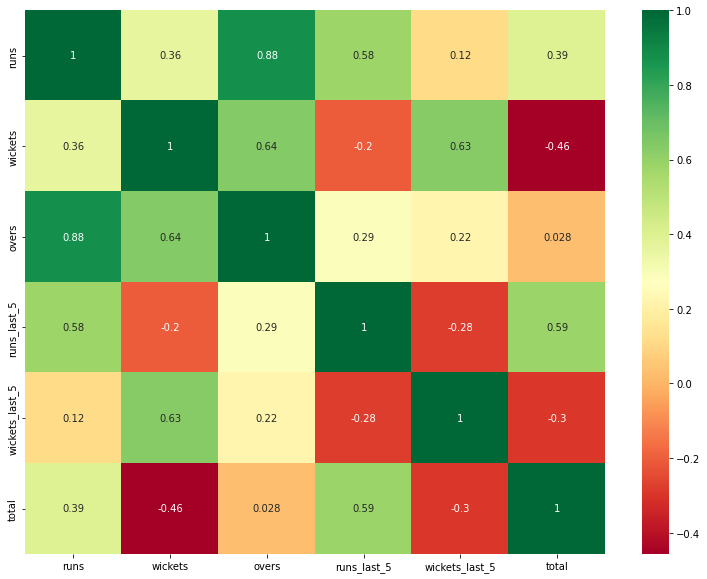

In [309]:
# Selecting correlated features using heatmap.
corr_matrix = dataset.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

##### Data Preprocessing
1. Handling categorical features
2. Splitting dataset into train and test set on the basis of date

In [310]:
# Converting categorical features using OneHotEncoding method

encoded_dataset = pd.get_dummies(data = dataset, columns=["bat_team", "bowl_team"])
encoded_dataset.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [311]:
encoded_dataset.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [312]:
# Rearranging the columns
encoded_dataset = encoded_dataset[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [313]:
# Splitting the data into train and test set
X_train = encoded_dataset.drop(labels='total', axis=1)[encoded_dataset['date'].dt.year <= 2016]
X_test = encoded_dataset.drop(labels='total', axis=1)[encoded_dataset['date'].dt.year >= 2017]

y_train = encoded_dataset[encoded_dataset['date'].dt.year <= 2016]['total'].values
y_test = encoded_dataset[encoded_dataset['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


## Model Building:

I will experiment with 3 different algorithms, they are as follows:
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression

**Linear Regression**

In [314]:
# Linear Regression model.
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [315]:
# Predicting results.
y_pred_lr = linear_regressor.predict(X_test)

In [316]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193294
Mean Squared Error (MSE): 251.00792310417438
Root Mean Squared Error (RMSE): 15.843229566732106


**Decision Tree**

In [317]:
# Decision tree regression model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [318]:
# Predicting Results
y_pred_dt = decision_regressor.predict(X_test)

In [319]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16.942044636429085
Mean Squared Error (MSE): 524.6850251979841
Root Mean Squared Error (RMSE): 22.906004129877918


**Random Forest**

In [320]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [321]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [322]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.673557835373172
Mean Squared Error (MSE): 330.6071692976762
Root Mean Squared Error (RMSE): 18.18260622951716


Note: Since Linear Regression model performs best as compared to other two, we use this model .

### Predictions:

1. Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)
2. Model tested on data from IPL Season 10 ie: (2017)
3. Model predicts on data from IPL Seasons 11 to 12 ie: (2018 to 2019)

In [323]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

#### Prediction 1
* Date: 16th April 2018
* IPL : Season 11
* Match number: 13
* Teams: Kolkata Knight Riders vs. Delhi Daredevils
* First Innings final score: 200/9

In [324]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 159 to 174


#### Prediction 2
* Date: 7th May 2018
* IPL : Season 11
* Match number: 39
* Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore
* First Innings final score: 146/10

In [325]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 138 to 153


#### Prediction 3
* Date: 17th May 2018
* IPL : Season 11
* Match number: 50
* Teams: Mumbai Indians vs. Kings XI Punjab
* First Innings final score: 186/8

In [326]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 180 to 195


#### Prediction 4
* Date: 30th March 2019
* IPL : Season 12
* Match number: 9
* Teams: Mumbai Indians vs. Kings XI Punjab
* First Innings final score: 176/7

In [327]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 179 to 194


#### Prediction 5
* Date: 11th April 2019
* IPL : Season 12
* Match number: 25
* Teams: Rajasthan Royals vs. Chennai Super Kings
* First Innings final score: 151/7

In [328]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 128 to 143


#### Prediction 6
* Date: 14th April 2019
* IPL : Season 12
* Match number: 30
* Teams: Sunrisers Hyderabad vs. Delhi Daredevils
* First Innings final score: 155/7

In [329]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 157 to 172


#### Prediction 7
* Date: 10th May 2019
* IPL : Season 12
* Match number: 59 (Eliminator)
* Teams: Delhi Daredevils vs. Chennai Super Kings
* First Innings final score: 147/9

In [330]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 137 to 152


Note: In IPL, it is very difficult to predict the actual score because in a moment of time the game can completely turn upside down!